In [223]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import requests
import json
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [179]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the file from the Resources folder
Copper_df = pd.read_csv(
    Path('Resources/Copper.csv'),
    index_col='DATE',
    infer_datetime_format=True, 
    parse_dates=True
)
Nickel_df = pd.read_csv(
    Path('Resources/Nickel.csv'),
    index_col='DATE',
    infer_datetime_format=True, 
    parse_dates=True
)
Zinc_df = pd.read_csv(
    Path('Resources/Zinc.csv'),
    index_col='DATE',
    infer_datetime_format=True, 
    parse_dates=True
)


# Review the first and last five rows of the DataFrame

Copper_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 1990-01-01 to 2021-11-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PCOPPUSDM  383 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [180]:
Nickel_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 1990-01-01 to 2021-11-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PNICKUSDM  383 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [181]:
Zinc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 1990-01-01 to 2021-11-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PZINCUSDM  383 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [182]:
Commodities_list = [Copper_df, Nickel_df, Zinc_df]
Commodities_df =pd.concat([Copper_df, Nickel_df, Zinc_df],axis=1).loc['2018-01-01':'2021-11-01']
display(Commodities_df)
Commodities_df.info()

,PCOPPUSDM,PNICKUSDM,PZINCUSDM
DATE,,,
2018-01-01,7065.852273,12864.87500,3441.522727
2018-02-01,7006.525000,13595.87500,3532.900000
2018-03-01,6799.178571,13392.50000,3269.178571
2018-04-01,6851.512500,13938.10000,3188.050000
2018-05-01,6825.273810,14366.48810,3059.869048
2018-06-01,6965.857143,15105.65476,3088.571429
2018-07-01,6250.750000,13793.86364,2656.125000
2018-08-01,6051.045455,13411.35227,2512.000000
2018-09-01,6050.762500,12510.35000,2434.675000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2018-01-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PCOPPUSDM  47 non-null     float64
 1   PNICKUSDM  47 non-null     float64
 2   PZINCUSDM  47 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


In [183]:
Commodities_df.rename(columns={'PCOPPUSDM': 'Copper', 'PNICKUSDM': 'Nickel', 'PZINCUSDM': 'Zinc'}, inplace=True)
display(Commodities_df)

,Copper,Nickel,Zinc
DATE,,,
2018-01-01,7065.852273,12864.87500,3441.522727
2018-02-01,7006.525000,13595.87500,3532.900000
2018-03-01,6799.178571,13392.50000,3269.178571
2018-04-01,6851.512500,13938.10000,3188.050000
2018-05-01,6825.273810,14366.48810,3059.869048
2018-06-01,6965.857143,15105.65476,3088.571429
2018-07-01,6250.750000,13793.86364,2656.125000
2018-08-01,6051.045455,13411.35227,2512.000000
2018-09-01,6050.762500,12510.35000,2434.675000


In [184]:
# Compute the `monthly_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
Monthly_Returns_df = Commodities_df.pct_change().dropna()
Monthly_Returns_df

,Copper,Nickel,Zinc
DATE,,,
2018-02-01,-0.008396,0.056821,0.026551
2018-03-01,-0.029593,-0.014959,-0.074647
2018-04-01,0.007697,0.040739,-0.024816
2018-05-01,-0.003830,0.030735,-0.040207
2018-06-01,0.020597,0.051451,0.009380
2018-07-01,-0.102659,-0.086841,-0.140015
2018-08-01,-0.031949,-0.027731,-0.054261
2018-09-01,-0.000047,-0.067182,-0.030782
2018-10-01,0.027901,-0.015622,0.098165


In [185]:
Monthly_Returns_df.describe()

,Copper,Nickel,Zinc
count,46.000000,46.000000,46.000000
mean,0.008018,0.011507,0.000700
std,0.046302,0.063222,0.055789
min,-0.102659,-0.117180,-0.140015
25%,-0.019289,-0.026629,-0.030378
50%,0.000641,0.020386,0.008658
75%,0.034514,0.050253,0.034182
max,0.107369,0.162579,0.108726


In [186]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [187]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [188]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [189]:
# Create the list for the required tickers
tickers = ["COST", "XLP","VDC","PG"]

In [190]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-01", tz="America/New_York").isoformat()

In [191]:
# Set timeframe to one day (1D)
timeframe = "1D"

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [192]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows,
).df

# Review the first five rows of the resulting DataFrame 
prices_df.head()

COST                                        PG  \
                             open     high      low   close   volume   open   
time                                                                          
2018-01-02 00:00:00-05:00  187.19  190.680  186.750  188.36  1746783  91.92   
2018-01-03 00:00:00-05:00  188.52  192.100  188.380  190.61  2258752  90.98   
2018-01-04 00:00:00-05:00  192.00  192.300  187.561  189.12  2566125  90.83   
2018-01-05 00:00:00-05:00  189.43  189.680  186.720  187.75  2000923  91.15   
2018-01-08 00:00:00-05:00  187.32  188.979  187.250  188.47  1126558  90.93   

                                                             VDC            \
                            high     low  close   volume    open      high   
time                                                                         
2018-01-02 00:00:00-05:00  91.93  90.550  90.66  5257189  146.16  146.3200   
2018-01-03 00:00:00-05:00  91.09  90.515  90.57  3976843  145.42  145.7000   
2018-01-04 00:00:00-05:00  91.77  90.610  91.18  4316526  145.42  146.2818   
2018-01-05 00:00:00-05:00  91.30  90.570  91.19  3848619  145.98  146.2242   
2018-01-08 00:00:00-05:00  91.77  90.930  91.71  3298886  146.16  146.6100   

                                                         XLP                   \
                                low   close    volume   open     high     low   
time                                                                            
2018-01-02 00:00:00-05:00  145.2684  145.29  171020.0  56.95  57.0200  56.530   
2018-01-03 00:00:00-05:00  145.1111  145.20  100558.0  56.63  56.7200  56.470   
2018-01-04 00:00:00-05:00  145.3002  145.60  316349.0  56.67  56.9453  56.530   
2018-01-05 00:00:00-05:00  145.4900  146.18  102662.0  56.77  56.9667  56.635   
2018-01-08 00:00:00-05:00  146.0010  146.59   99092.0  56.85  57.1200  56.820   

                                            
                           close    volume  
time                                        
2018-01-02 00:00:00-05:00  56.57  11288883  
2018-01-03 00:00:00-05:00  56.52   9795436  
2018-01-04 00:00:00-05:00  56.69   7205552  
2018-01-05 00:00:00-05:00  56.94   7524295  
2018-01-08 00:00:00-05:00  57.07   6560047

In [193]:
stocks_monthly=prices_df.resample('MS').last()
stocks_monthly.head()


COST                                          PG  \
                             open      high       low   close   volume   open   
time                                                                            
2018-01-01 00:00:00-05:00  197.87  198.4747  194.1000  194.88  1723240  86.81   
2018-02-01 00:00:00-05:00  191.60  193.7600  190.8900  190.90  1228694  80.68   
2018-03-01 00:00:00-05:00  184.74  188.6400  184.4100  187.86  1438633  79.43   
2018-04-01 00:00:00-04:00  197.10  199.0400  196.3852  197.19  1117964  72.91   
2018-05-01 00:00:00-04:00  200.21  200.6972  197.7000  198.25  2802111  74.67   

                                                                VDC            \
                             high      low  close    volume    open      high   
time                                                                            
2018-01-01 00:00:00-05:00  87.410  86.0750  86.38   7246937  149.38  149.6499   
2018-02-01 00:00:00-05:00  80.790  78.5000  78.52  11284842  139.42  139.6000   
2018-03-01 00:00:00-05:00  80.490  79.1799  79.28   7289155  135.72  136.8699   
2018-04-01 00:00:00-04:00  72.915  72.1600  72.33   7806891  132.13  132.7370   
2018-05-01 00:00:00-04:00  74.690  72.8000  73.15   7705467  131.24  131.2400   

                                                         XLP                   \
                               low    close    volume   open     high     low   
time                                                                            
2018-01-01 00:00:00-05:00  147.950  148.550  189536.0  58.14  58.2900  57.585   
2018-02-01 00:00:00-05:00  137.569  137.569   64497.0  54.29  54.3200  53.410   
2018-03-01 00:00:00-05:00  135.590  136.150  134563.0  52.48  52.9501  52.480   
2018-04-01 00:00:00-04:00    0.000  131.080   92090.0  50.86  51.0852  50.360   
2018-05-01 00:00:00-04:00  129.100  129.600  216627.0  50.38  50.4300  49.470   

                                            
                           close    volume  
time                                        
2018-01-01 00:00:00-05:00  57.83  12284388  
2018-02-01 00:00:00-05:00  53.41  10943106  
2018-03-01 00:00:00-05:00  52.63  12805795  
2018-04-01 00:00:00-04:00  50.45  12479239  
2018-05-01 00:00:00-04:00  49.67  17843563

In [194]:
stocks_close_df=stocks_monthly.xs("close",level=1,axis="columns")
stocks_close_df.head()

,COST,PG,VDC,XLP
time,,,,
2018-01-01 00:00:00-05:00,194.88,86.38,148.550,57.83
2018-02-01 00:00:00-05:00,190.90,78.52,137.569,53.41
2018-03-01 00:00:00-05:00,187.86,79.28,136.150,52.63
2018-04-01 00:00:00-04:00,197.19,72.33,131.080,50.45
2018-05-01 00:00:00-04:00,198.25,73.15,129.600,49.67


In [195]:
stocks_close_df.index = stocks_close_df.index.date



In [196]:
assets_df=pd.concat([Commodities_df,stocks_close_df],axis=1)

In [197]:
assets_df.dropna()

,Copper,Nickel,Zinc,COST,PG,VDC,XLP
2018-01-01,7065.852273,12864.87500,3441.522727,194.8800,86.380,148.5500,57.8300
2018-02-01,7006.525000,13595.87500,3532.900000,190.9000,78.520,137.5690,53.4100
2018-03-01,6799.178571,13392.50000,3269.178571,187.8600,79.280,136.1500,52.6300
2018-04-01,6851.512500,13938.10000,3188.050000,197.1900,72.330,131.0800,50.4500
2018-05-01,6825.273810,14366.48810,3059.869048,198.2500,73.150,129.6000,49.6700
2018-06-01,6965.857143,15105.65476,3088.571429,209.0300,78.070,134.2500,51.5100
2018-07-01,6250.750000,13793.86364,2656.125000,218.7200,80.880,138.9200,53.5600
2018-08-01,6051.045455,13411.35227,2512.000000,233.1400,82.930,140.0896,53.8100
2018-09-01,6050.762500,12510.35000,2434.675000,234.8900,83.220,140.1500,53.9200
2018-10-01,6219.586957,12314.91304,2673.673913,228.6300,88.660,142.4800,55.0400


In [198]:
assets_df.corr()

,Copper,Nickel,Zinc,COST,PG,VDC,XLP
Copper,1.000000,0.807352,0.649963,0.695988,0.483730,0.779058,0.728068
Nickel,0.807352,1.000000,0.400987,0.794215,0.649627,0.814884,0.789761
Zinc,0.649963,0.400987,1.000000,0.061106,-0.181601,0.170074,0.110052
COST,0.695988,0.794215,0.061106,1.000000,0.910465,0.939177,0.941463
PG,0.483730,0.649627,-0.181601,0.910465,1.000000,0.897285,0.923665
VDC,0.779058,0.814884,0.170074,0.939177,0.897285,1.000000,0.996209
XLP,0.728068,0.789761,0.110052,0.941463,0.923665,0.996209,1.000000


In [199]:
assets_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [200]:
# Define features set X 
X = Commodities_df.shift().dropna()

# Display the features DataFrame
X.head()

,Copper,Nickel,Zinc
DATE,,,
2018-02-01,7065.852273,12864.8750,3441.522727
2018-03-01,7006.525000,13595.8750,3532.900000
2018-04-01,6799.178571,13392.5000,3269.178571
2018-05-01,6851.512500,13938.1000,3188.050000
2018-06-01,6825.273810,14366.4881,3059.869048


In [201]:
# Define target set by selecting the DEFAULT column
y = stocks_monthly.xs("close",level=1,axis="columns")[1:]

# Display a sample of y
y[:5]

,COST,PG,VDC,XLP
time,,,,
2018-02-01 00:00:00-05:00,190.90,78.52,137.569,53.41
2018-03-01 00:00:00-05:00,187.86,79.28,136.150,52.63
2018-04-01 00:00:00-04:00,197.19,72.33,131.080,50.45
2018-05-01 00:00:00-04:00,198.25,73.15,129.600,49.67
2018-06-01 00:00:00-04:00,209.03,78.07,134.250,51.51


In [202]:
X_train= X.iloc[:33]
y_train=y.iloc[:33]
X_test= X.iloc[33:]
y_test=y.iloc[33:]


In [203]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [204]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [205]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [206]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="linear"))

In [207]:
 #Display the Sequential model summary
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 8         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [209]:
# Fit the model using 100 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 2211.4492 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 2ms/step 

In [210]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 3046.9971 - accuracy: 0.0000e+00 - 150ms/epoch - 150ms/step
Loss: 3046.9970703125, Accuracy: 0.0


{'loss': [2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 2211.44921875, 

<AxesSubplot:>

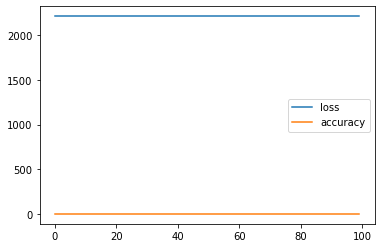

In [211]:
print(model.history)
df=pd.DataFrame(model.history)
df.plot()

In [213]:

# Create linear regression object
linear_regr = linear_model.LinearRegression()


In [214]:
# Train the model using the training sets
linear_regr.fit(X_train,y_train)


LinearRegression()

In [218]:
linear_regr.fit(X_train_scaled,y_train)

LinearRegression()

In [222]:
# Make predictions using the testing set
y_pred = linear_regr.predict(X_test_scaled)
print(y_pred)


[[328.46221703 126.71369524 159.16012586  62.20473863]
 [317.38123391 121.50028771 157.74080696  61.49780737]
 [347.11196344 129.08003412 163.10336787  63.55692855]
 [377.5568213  138.92383008 168.92381591  65.9547419 ]
 [404.3141266  146.265921   173.63769571  67.8004289 ]
 [407.12532061 144.98332096 171.53246708  66.77590498]
 [420.53532515 148.29527462 173.58753873  67.54762767]
 [453.33966316 156.39345126 179.42281789  69.7664846 ]
 [430.41008424 150.61679201 176.47014421  68.66862716]
 [428.22653384 150.65491262 177.09293103  68.97830472]
 [420.44841439 148.30907213 176.22706892  68.63291374]
 [412.69812325 145.82432299 175.25413189  68.23266994]
 [390.8742443  136.23872942 171.42113036  66.46548915]]


In [224]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean squared error: 769.20
Coefficient of determination: -1.19


In [225]:
print(y_test)


                             COST       PG     VDC     XLP
time                                                      
2020-11-01 00:00:00-04:00  391.77  138.905  172.13  66.910
2020-12-01 00:00:00-05:00  376.78  139.000  174.20  67.450
2021-01-01 00:00:00-05:00  352.04  128.200  166.94  64.090
2021-02-01 00:00:00-05:00  330.95  123.460  165.64  63.300
2021-03-01 00:00:00-05:00  352.47  135.570  178.02  68.240
2021-04-01 00:00:00-04:00  372.07  133.430  181.56  69.580
2021-05-01 00:00:00-04:00  378.28  134.920  184.71  70.780
2021-06-01 00:00:00-04:00  395.79  134.920  182.45  69.950
2021-07-01 00:00:00-04:00  429.72  142.160  185.46  71.470
2021-08-01 00:00:00-04:00  455.49  142.350  187.63  72.270
2021-09-01 00:00:00-04:00  449.34  139.780  179.18  68.835
2021-10-01 00:00:00-04:00  491.53  143.000  185.63  71.250
2021-11-01 00:00:00-04:00  492.03  142.650  186.28  71.360
